In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd


from statannotations.Annotator import Annotator

%matplotlib inline

import matplotlib
matplotlib.rcParams.update({"pdf.fonttype":42})

In [2]:
sns.__version__

'0.11.1'

In [3]:
basins = pd.read_csv("basin_statistics.csv")

In [14]:
basins['max_disp_zone'].value_counts()

watertracks      69
indeterminate    66
fluvial          38
hillslopes       18
Name: max_disp_zone, dtype: int64

In [8]:
basins.columns

Index(['Unnamed: 0', 'junct', 'Unnamed_ 0', 'y', 'x', '1517_maske', '1517_all',
       'seward2_hs', 'seward_hsp', 'slope_15m', 'aspect_15m', '1519_all',
       '1519_maske', 'aspect_40m', 'seward_h_1', 'slope_40m', 'Outlet Ele',
       '1519_all_z', '1519_mas_1', '1517_all_z', '1517_mas_1', 'Area',
       'area_km2', 'geometry', 'max_disp_zone'],
      dtype='object')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

watertracks vs. fluvial: Mann-Whitney-Wilcoxon test two-sided, P_val:8.693e-04 U_stat=1.823e+03


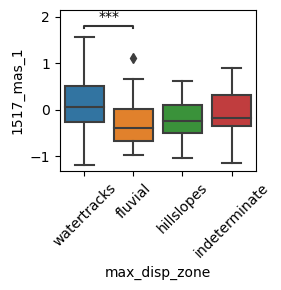

In [22]:
fig, ax = plt.subplots(figsize=(3,3),dpi=100)

order = ['watertracks','fluvial','hillslopes','indeterminate']
plot0 = sns.boxplot(x='max_disp_zone', y='1517_mas_1',
            #hue='max_disp_zone',
            data=basins,
                    order=order,
                    #    inner="stick",
                       
                   ax=ax)

pairs=[
    (("watertracks"),('fluvial')),
    # (("watertracks"),('hillslopes')), # not significant
    # (("watertracks"),('indeterminate')), # not significant 
]

annot = Annotator(plot0, pairs, data=basins, x='max_disp_zone', y='1517_mas_1',
                  order=order,
                  #hue=hue, hue_order=hue_order,
                  #showfliers = False,
                 #palette=["#0081a7", "#00afb9", "#fed9b7"],
                 #ax=ax
                 )
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()

ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.savefig('./figure_outputs/displacement_regime_all_basins.pdf', bbox_inches="tight")

In [15]:
large_basins =basins.loc[basins['Area'] > 0.5e6]

large_basins['max_disp_zone'].value_counts()

watertracks      37
indeterminate    20
fluvial          16
hillslopes       10
Name: max_disp_zone, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

watertracks vs. fluvial: Mann-Whitney-Wilcoxon test two-sided, P_val:1.672e-02 U_stat=4.200e+02


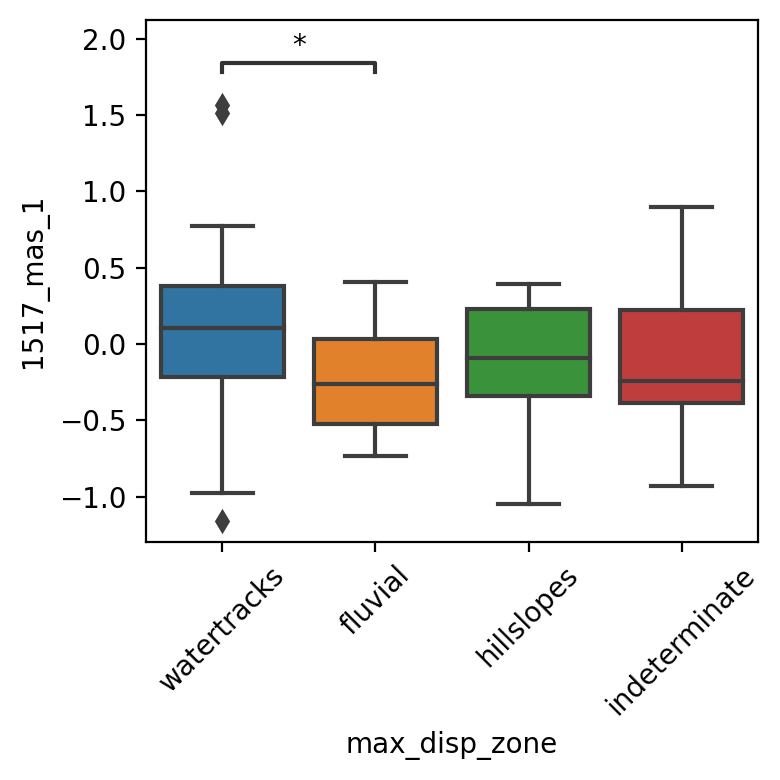

In [19]:
fig, ax = plt.subplots(figsize=(4,4),dpi=200)

order = ['watertracks','fluvial','hillslopes','indeterminate']
plot0 = sns.boxplot(x='max_disp_zone', y='1517_mas_1',
            #hue='max_disp_zone',
            data=large_basins,
                    order=order,
                    #    inner="stick",
                       
                   ax=ax)

pairs=[
    (("watertracks"),('fluvial')),
    # (("watertracks"),('hillslopes')), # not significant
    # (("watertracks"),('indeterminate')), # not significant 
]

annot = Annotator(plot0, pairs, data=large_basins, x='max_disp_zone', y='1517_mas_1',
                  order=order,
                  #hue=hue, hue_order=hue_order,
                  #showfliers = False,
                 #palette=["#0081a7", "#00afb9", "#fed9b7"],
                 #ax=ax
                 )
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.annotate()

ax.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.savefig('./figure_outputs/displacement_regime_large_basins.pdf', bbox_inches="tight")